In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier



from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn import metrics

# for Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import pickle

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# for styling
plt.style.use('seaborn-whitegrid')


In [3]:
data=pd.read_csv('diabetes_prediction_dataset.csv')

Summery of Data

In [4]:
data.shape

(100000, 9)

In [5]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
data.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
79611,Female,78.0,0,0,never,26.53,5.0,85,0
18753,Female,43.0,0,0,No Info,27.32,9.0,240,1
55647,Female,52.0,0,0,never,27.32,6.1,130,0
96766,Female,70.0,0,0,No Info,22.90,6.5,158,0
14108,Male,68.0,0,0,No Info,31.05,4.0,200,0
68483,Female,50.0,0,0,former,31.95,4.0,159,0
13808,Male,51.0,0,0,No Info,24.05,4.8,140,0
96126,Male,79.0,0,0,No Info,27.32,6.0,130,0
64862,Male,56.0,0,0,never,29.43,6.5,126,0
12711,Male,7.0,0,0,No Info,18.35,5.7,145,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Preprocessing of Data

In [8]:
#check null values
data.isna().mean()*100
# data.isnull().sum()/len(data)*100

gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64

There is no null value present

In [9]:
data.duplicated().sum()

3854

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
data.describe(include='O')

,gender,smoking_history
count,96146,96146
unique,3,6
top,Female,never
freq,56161,34398


In [13]:
for i in data.describe(include='O'):
    print(i)
    print(data[i].unique(),'\n')
    print('--'*30)

gender
['Female' 'Male' 'Other'] 

------------------------------------------------------------
smoking_history
['never' 'No Info' 'current' 'former' 'ever' 'not current'] 

------------------------------------------------------------


In [14]:
#check unique value of columns
# for i in data:
#     print(i, data[i].unique())

In [15]:
# data['gender']=data['gender'].replace('Other','Female')

In [16]:
# data['gender'].unique()

Convert columns into proper format

In [17]:
# data['age']=data['age'].astype('int64')

In [18]:
# data.info()

# EDA and Visualization



separate numerical and categorical column

<AxesSubplot:>

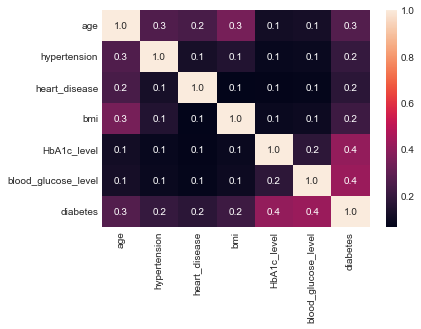

In [19]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

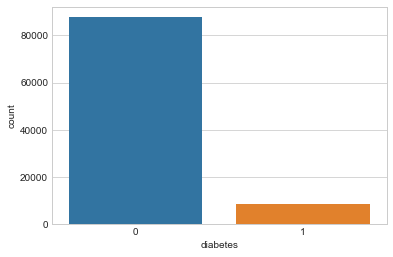

In [20]:
sns.countplot(data["diabetes"])

In [21]:
# numerical
data_num=data.select_dtypes(exclude='object')

In [22]:
data_num

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0
99996,2.0,0,0,17.37,6.5,100,0
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,0


In [23]:
#categorical
data_cat=data.select_dtypes(include='object')

In [24]:
data_cat.columns

Index(['gender', 'smoking_history'], dtype='object')

stastical observation on numerical column

In [25]:
data_num.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [26]:
data_num.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [27]:
#calculate variane
for i in data_num:
    
     print(i,statistics.variance(data_num[i]))

<IPython.core.display.Javascript object>

age 504.58401386588974


<IPython.core.display.Javascript object>

hypertension 0.07157960306733009


<IPython.core.display.Javascript object>

heart_disease 0.0391380901432714


<IPython.core.display.Javascript object>

bmi 45.801973907567685


<IPython.core.display.Javascript object>

HbA1c_level 1.1518269808686272


<IPython.core.display.Javascript object>

blood_glucose_level 1673.6093929522176


<IPython.core.display.Javascript object>

diabetes 0.08043806719628062


Observation near to mean value gets the lower result and far from means gets higher value.

In [28]:
#standanrd deviation
for i in data_num:
    
     print(i,statistics.stdev(data_num[i]))

<IPython.core.display.Javascript object>

age 22.46294757741935


<IPython.core.display.Javascript object>

hypertension 0.2675436470322741


<IPython.core.display.Javascript object>

heart_disease 0.19783349095456867


<IPython.core.display.Javascript object>

bmi 6.767715560480338


<IPython.core.display.Javascript object>

HbA1c_level 1.073232025644328


<IPython.core.display.Javascript object>

blood_glucose_level 40.909771362746795


<IPython.core.display.Javascript object>

diabetes 0.28361605595642964


Low standard deviation indicates data points close to mean.

# finding outliers

In [29]:
Q1=data_num.quantile(0.25)
Q3=data_num.quantile(0.75)
IQR=Q3-Q1
LR=Q1-(IQR*1.5)
UR=Q3+(IQR*1.5)
print("The Lower Quartile outliers are :\n", LR)
print("The Upper Quartile outliers are :\n ",UR)

The Lower Quartile outliers are :
 age                   -28.50
hypertension            0.00
heart_disease           0.00
bmi                    13.71
HbA1c_level             2.70
blood_glucose_level    11.50
diabetes                0.00
dtype: float64
The Upper Quartile outliers are :
  age                    111.50
hypertension             0.00
heart_disease            0.00
bmi                     39.55
HbA1c_level              8.30
blood_glucose_level    247.50
diabetes                 0.00
dtype: float64


In [30]:
#visualize using boxplot

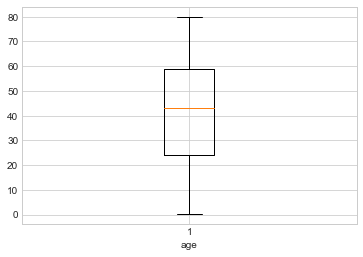

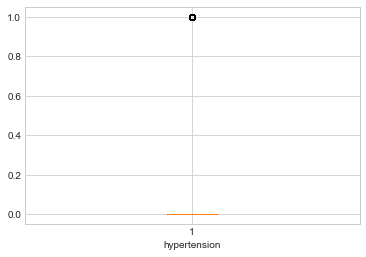

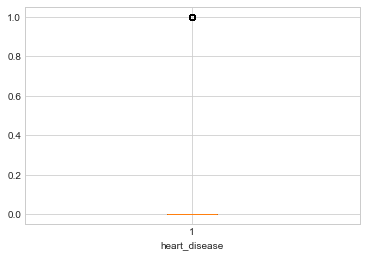

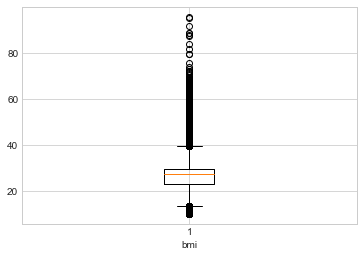

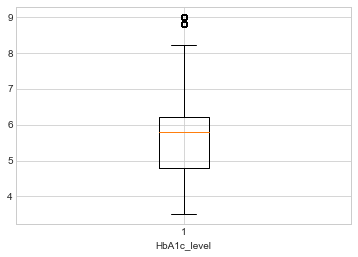

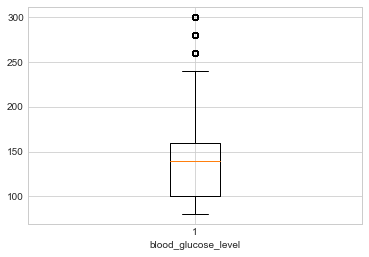

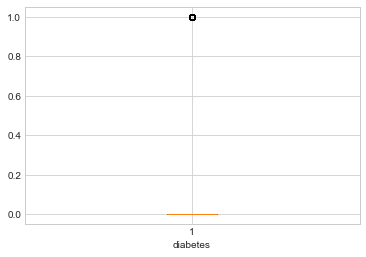

In [31]:
for i in data_num:
    plt.figure()
    plt.boxplot(data_num[i])
    plt.xlabel(i)

displaying outliers

In [32]:
Q1 = np.percentile(data_num['age'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_num['age'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data_num.shape)
 
# Upper bound
upper = np.where(data_num['age'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data_num['age'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (96146, 7)
Outliers are: (array([], dtype=int64),) (array([], dtype=int64),)


In [33]:
Q1 = np.percentile(data_num['hypertension'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_num['hypertension'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data_num.shape)
 
# Upper bound
upper = np.where(data_num['hypertension'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data_num['hypertension'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (96146, 7)
Outliers are: (array([    0,     1,     2, ..., 96143, 96144, 96145], dtype=int64),) (array([    0,     1,     2, ..., 96143, 96144, 96145], dtype=int64),)


In [34]:
Q1 = np.percentile(data_num['heart_disease'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_num['heart_disease'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data_num.shape)
 
# Upper bound
upper = np.where(data_num['heart_disease'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data_num['heart_disease'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (96146, 7)
Outliers are: (array([    0,     1,     2, ..., 96143, 96144, 96145], dtype=int64),) (array([    1,     2,     3, ..., 96143, 96144, 96145], dtype=int64),)


In [35]:
Q1 = np.percentile(data_num['bmi'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_num['bmi'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data_num.shape)
 
# Upper bound
upper = np.where(data_num['bmi'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data_num['bmi'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (96146, 7)
Outliers are: (array([   11,    39,    59, ..., 96108, 96114, 96140], dtype=int64),) (array([  264,   268,   677,   824,  1089,  1091,  1134,  1318,  1366,
        1888,  2049,  2458,  2754,  3543,  3627,  3739,  3782,  3978,
        4426,  5036,  5157,  5257,  5413,  5800,  6103,  6319,  6349,
        6385,  6587,  6648,  7232,  7427,  7761,  8479,  9119,  9319,
        9483,  9642,  9743,  9924,  9982, 10033, 10072, 10502, 10675,
       10891, 10912, 11026, 11039, 11575, 11618, 11714, 11748, 11895,
       12287, 12390, 12540, 12794, 12832, 12873, 13028, 13984, 14357,
       14620, 14707, 15085, 15240, 15250, 15252, 15433, 15540, 15739,
       16172, 16187, 16203, 16454, 16469, 16540, 16576, 16941, 17328,
       17630, 18162, 18405, 18655, 19189, 19555, 19587, 19648, 19734,
       20242, 20806, 21241, 21326, 21929, 22229, 22617, 22649, 22725,
       22755, 22915, 23251, 23493, 23616, 23623, 23970, 24293, 24459,
       24596, 25284, 25372, 25608, 25994, 26449, 27

In [36]:
Q1 = np.percentile(data_num['HbA1c_level'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_num['HbA1c_level'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data_num.shape)
 
# Upper bound
upper = np.where(data_num['HbA1c_level'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data_num['HbA1c_level'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (96146, 7)
Outliers are: (array([   40,    55,    59, ..., 95879, 95909, 96084], dtype=int64),) (array([], dtype=int64),)


In [37]:
Q1 = np.percentile(data_num['blood_glucose_level'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_num['blood_glucose_level'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data_num.shape)
 
# Upper bound
upper = np.where(data_num['blood_glucose_level'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data_num['blood_glucose_level'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (96146, 7)
Outliers are: (array([   38,    94,   104, ..., 96026, 96093, 96111], dtype=int64),) (array([], dtype=int64),)


In [38]:
Q1 = np.percentile(data_num['diabetes'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_num['diabetes'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data_num.shape)
 
# Upper bound
upper = np.where(data_num['diabetes'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data_num['diabetes'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (96146, 7)
Outliers are: (array([    0,     1,     2, ..., 96143, 96144, 96145], dtype=int64),) (array([    0,     1,     2, ..., 96143, 96144, 96145], dtype=int64),)


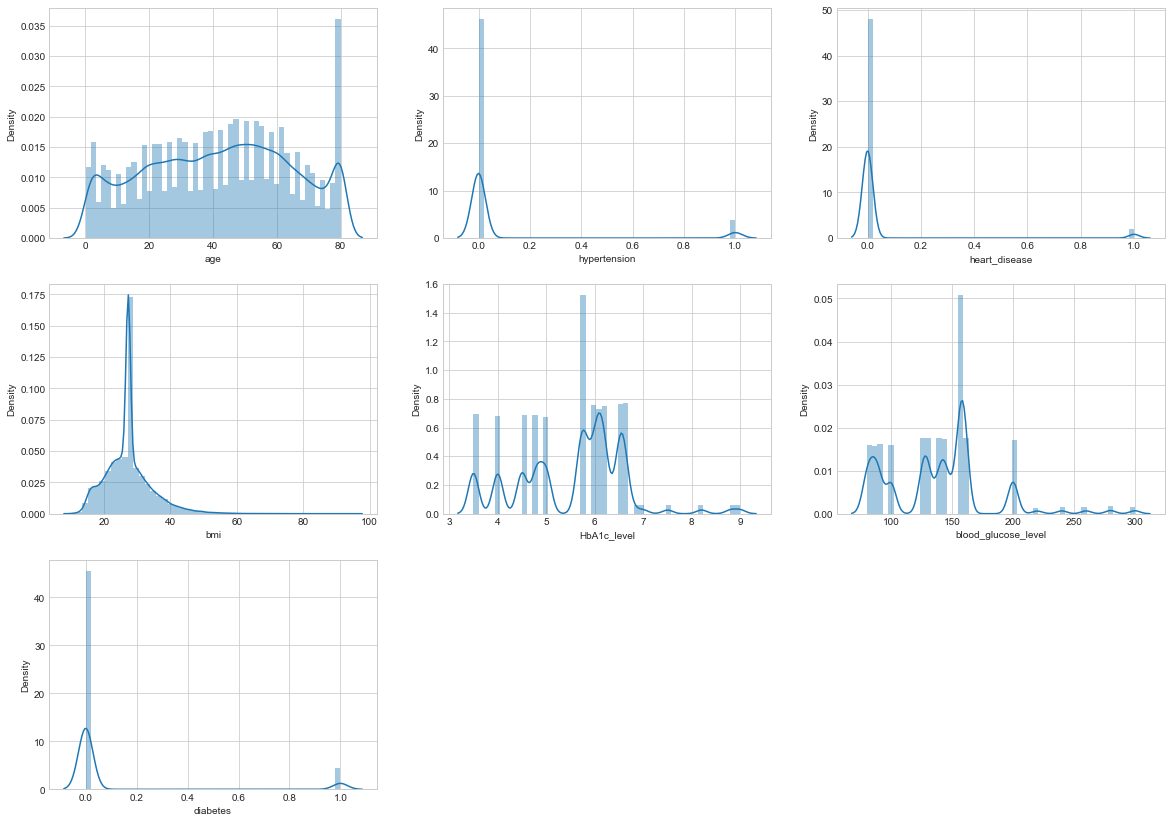

In [39]:
#norml distribution 
#Distplot
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in data_num:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data_num[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

In [40]:
#capping using z-score
upper_limit = data_num['blood_glucose_level'].mean() + 3*data_num['blood_glucose_level'].std()
lower_limit = data_num ['blood_glucose_level'].mean() - 3*data_num['blood_glucose_level'].std()

data_num['blood_glucose_level'] = np.where(
    data_num['blood_glucose_level']>upper_limit,
    upper_limit,
    np.where(
        data_num['blood_glucose_level']<lower_limit,
        lower_limit,
        data_num['blood_glucose_level']
    )
)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bfc5123670>,
 'caps': [<matplotlib.lines.Line2D at 0x1bfc5123c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bfc51233a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bfc57431f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bfc57434c0>],
 'means': []}

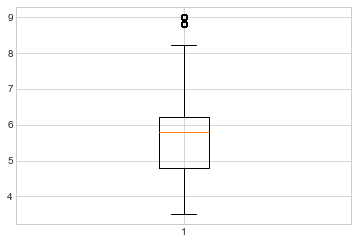

In [41]:

plt.boxplot(data_num['HbA1c_level'])

In [42]:
percentile25=data_num['HbA1c_level'].quantile(0.25)
percentile75=data_num['HbA1c_level'].quantile(0.75)


In [43]:
percentile25

4.8

In [44]:
iqr=percentile75-percentile25

In [45]:
upper=percentile75+1.5*iqr
lower=percentile25-1.5*iqr

In [46]:
upper

8.3

In [47]:
data_num[data_num['HbA1c_level']>8.3]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
40,73.0,0,0,25.91,9.0,160.000000,1
55,50.0,0,0,37.16,9.0,159.000000,1
59,67.0,0,0,63.48,8.8,155.000000,1
135,80.0,0,0,22.06,9.0,155.000000,1
169,61.0,0,0,39.36,9.0,140.000000,1
...,...,...,...,...,...,...,...
99523,80.0,1,1,19.25,8.8,200.000000,1
99663,80.0,0,0,34.00,9.0,260.947545,1
99706,54.0,1,0,23.06,9.0,126.000000,1
99740,80.0,0,1,25.76,9.0,220.000000,1


In [48]:
#capping using IQR
data_num['HbA1c_level'] = np.where(
    data_num['HbA1c_level']>upper,
    upper,
    np.where(
        data_num['HbA1c_level']<lower,
        lower,
        data_num['HbA1c_level']
    )
)

<AxesSubplot:xlabel='HbA1c_level'>

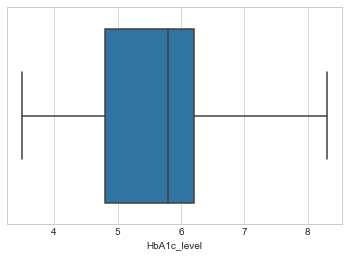

In [49]:
sns.boxplot(data_num['HbA1c_level'])

There is no outlier present after capping

<AxesSubplot:xlabel='bmi'>

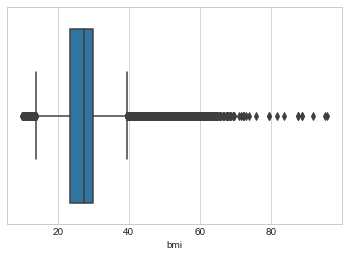

In [50]:
sns.boxplot(data_num['bmi'])

In [51]:
#capping of outliers
Percentile25=data_num['bmi'].quantile(0.25)
Percentile75=data_num['bmi'].quantile(0.75)

In [52]:
Iqr=Percentile75-Percentile25

In [53]:
Upper=Percentile75+1.5*Iqr
Lower=Percentile25-1.5*Iqr

In [54]:
data_num['bmi'] = np.where(
    data_num['bmi']>Upper,
    Upper,
    np.where(
        data_num['bmi']<Lower,
        Lower,
        data_num['bmi']
    )
)

<AxesSubplot:xlabel='bmi'>

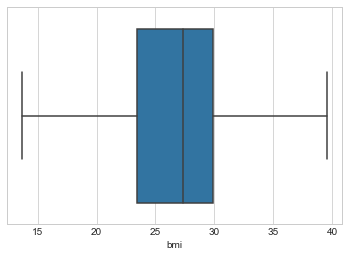

In [55]:
sns.boxplot(data_num['bmi'])

THere is no outliers

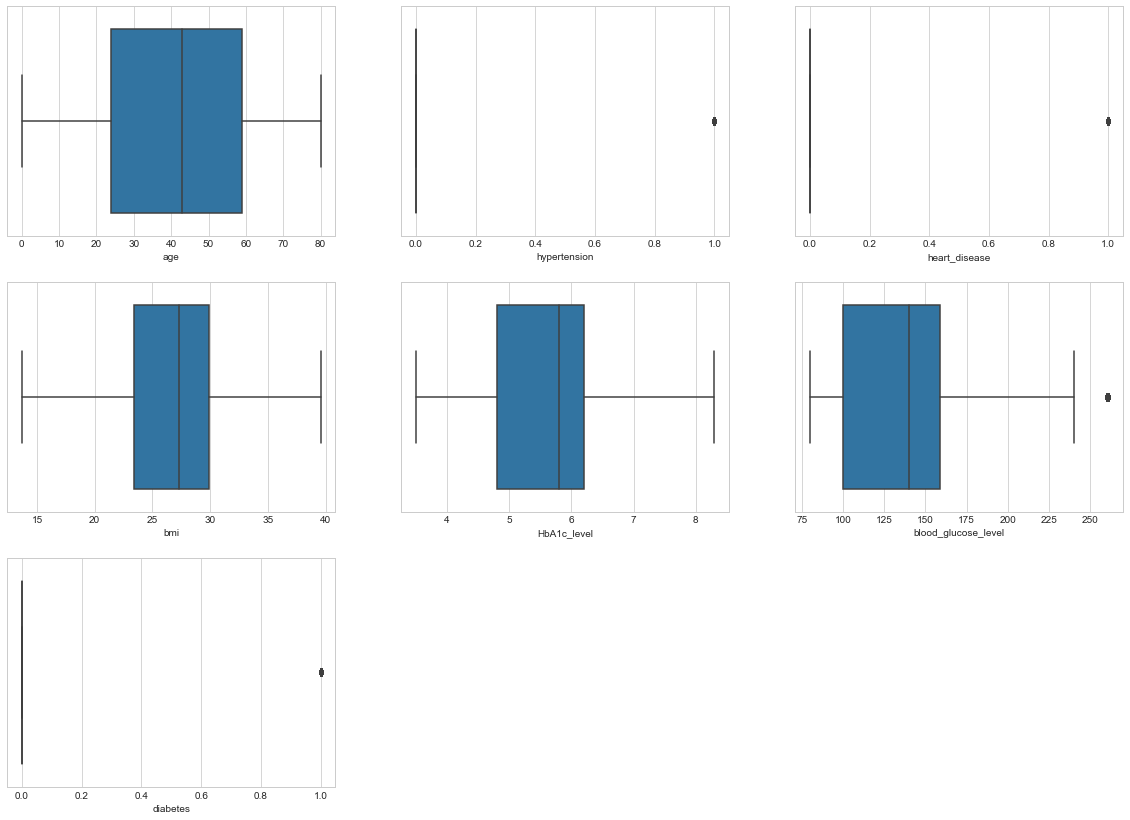

In [56]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in data_num:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data_num[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

# Dealing with distribution

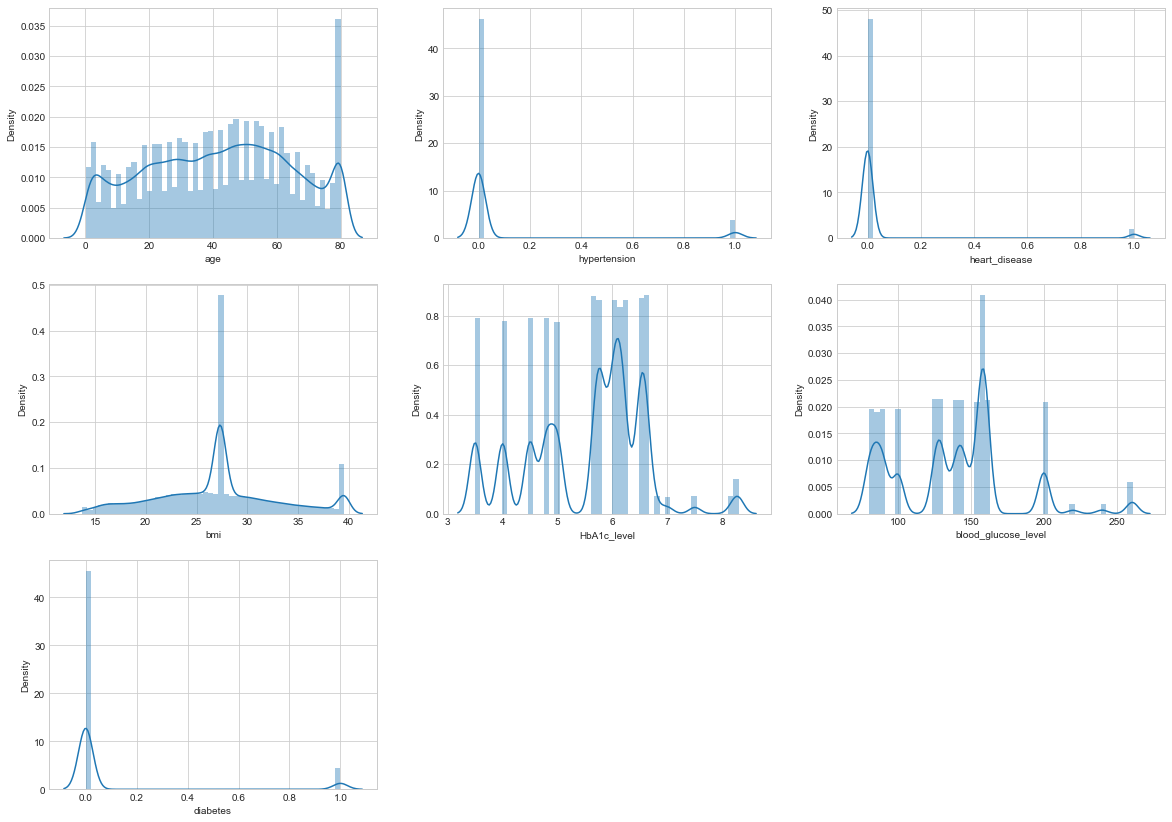

In [57]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in data_num:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data_num[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='blood_glucose_level', ylabel='count'>

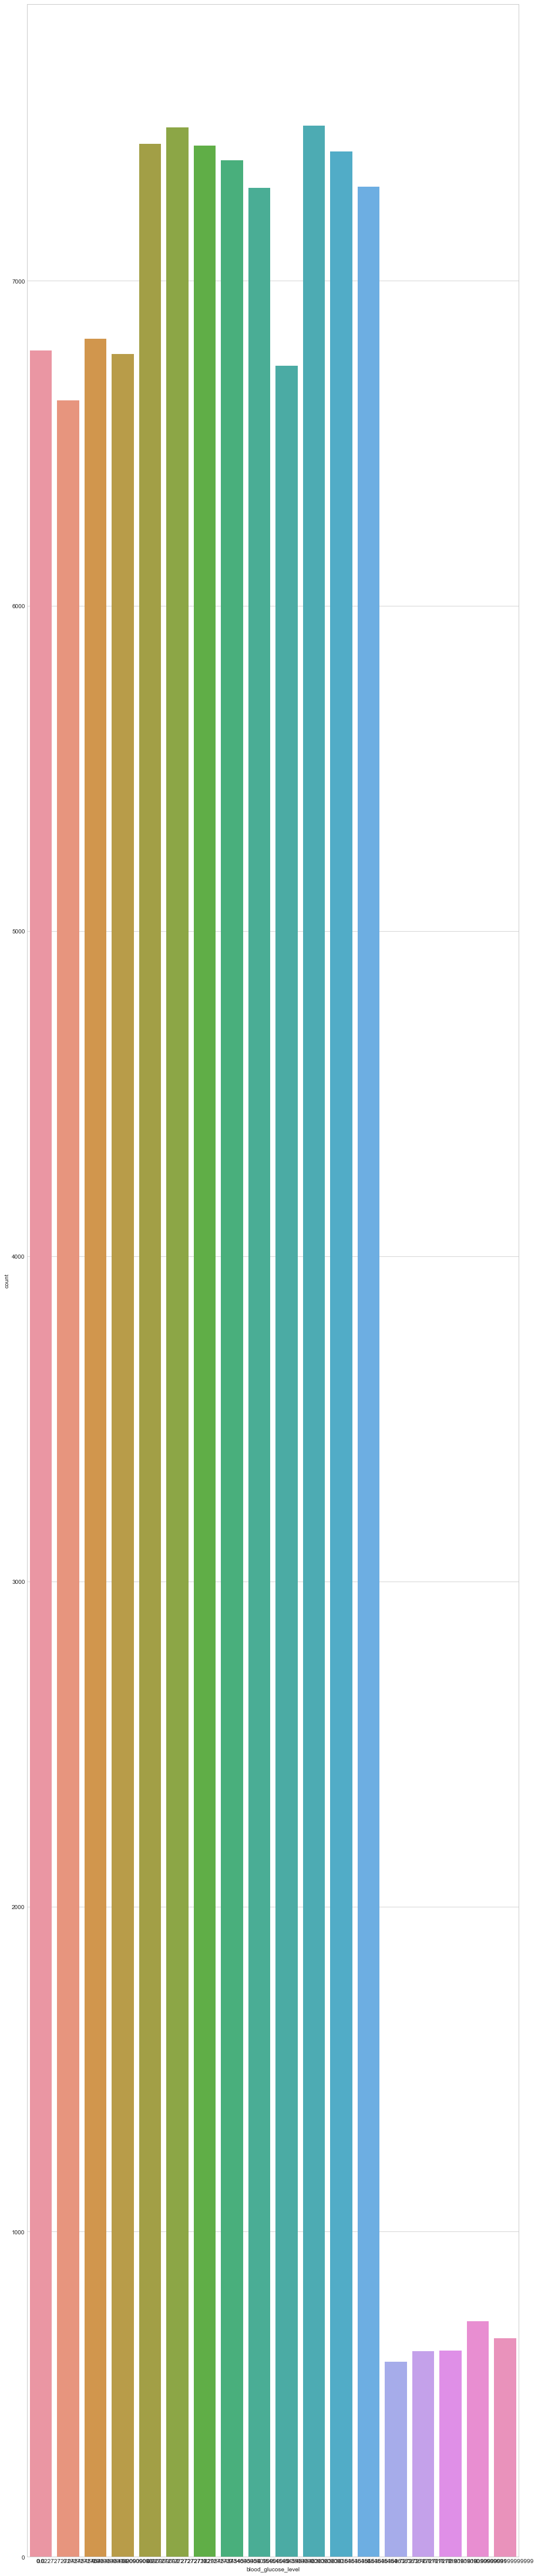

No feature is normally distributed

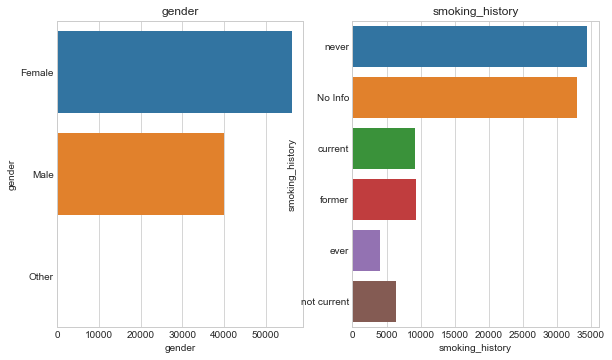

In [58]:
#EDA Categorical column
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cat_features in data_cat:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_features,data=data)
    plt.xlabel(cat_features)
    plt.title(cat_features)
    plotnumber+=1
plt.show()

# Encoding

In [59]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [60]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [61]:
#one hot Encoding
from  sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data['gender']= onehotencoder.fit_transform(data.gender.values.reshape(-1,1)).toarray()

In [62]:
data['smoking_history']

0          never
1        No Info
2          never
3        current
4        current
          ...   
99994    No Info
99996    No Info
99997     former
99998      never
99999    current
Name: smoking_history, Length: 96146, dtype: object

In [63]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['smoking_history']=label.fit_transform(data['smoking_history'])

# Scaling

In [64]:
data_num.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [65]:
num_features=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

In [66]:
#Min-Max Scaler
scaler = MinMaxScaler(feature_range=(0, 1))

data[num_features] = scaler.fit_transform(data[num_features]) 

In [67]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,1.000000,0.0,1.0,0.8,0.177171,0.563636,0.272727,0.0
1,1.0,0.674675,0.0,0.0,0.0,0.202031,0.563636,0.000000,0.0
2,0.0,0.349349,0.0,0.0,0.8,0.202031,0.400000,0.354545,0.0
3,1.0,0.449449,0.0,0.0,0.2,0.156863,0.272727,0.340909,0.0
4,0.0,0.949950,1.0,1.0,0.2,0.118231,0.236364,0.340909,0.0
...,...,...,...,...,...,...,...,...,...
99994,1.0,0.449449,0.0,0.0,0.0,0.170285,0.236364,0.295455,0.0
99996,1.0,0.024024,0.0,0.0,0.0,0.085901,0.545455,0.090909,0.0
99997,0.0,0.824825,0.0,0.0,0.6,0.207983,0.400000,0.340909,0.0
99998,1.0,0.299299,0.0,0.0,0.8,0.296569,0.090909,0.090909,0.0


In [68]:
#splitting Data in x and y
x=data.drop(['diabetes'],axis=1)
y=data['diabetes']

In [69]:
#splitting data into train and split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)


In [70]:
x_train.shape, x_test.shape

((67302, 8), (67302,))

In [74]:
## Oversampling
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size= 0.7,random_state=42)
smote=SMOTE()
x_train_os, y_train_os = smote.fit_resample(x_train, y_train)
print("The number of Classes before fit {}".format(Counter(y_train)))
print("The number of Classes after fit {}".format(Counter(y_train_os)))

The number of Classes before fit Counter({0.0: 61397, 1.0: 5905})
The number of Classes after fit Counter({0.0: 61397, 1.0: 61397})


# Model Building

# Logistic regression

In [75]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',C=1, random_state = 40,solver='lbfgs',max_iter=100,multi_class='auto')
lr.fit(x_train_os,y_train_os)
ypred=lr.predict(x_test)

In [76]:
lr.score(x_test,y_test)

0.8856607960061018

In [81]:
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
print("Precision:",metrics.precision_score(y_test, ypred))
print("Recall:",metrics.recall_score(y_test, ypred))

Accuracy: 0.8856607960061018
Precision: 0.4319682959048877
Recall: 0.8882421420256111


In [83]:
confusion_matrix(y_test,ypred)


array([[23257,  3010],
       [  288,  2289]], dtype=int64)

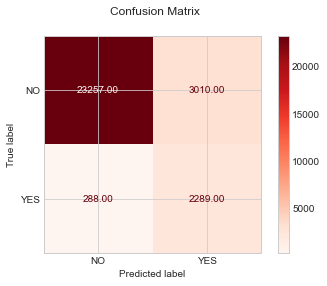

In [89]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(lr, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

# Decision tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
deseciontree_model=DecisionTreeClassifier(max_depth = 10, random_state = 40)
deseciontree_model.fit(x_train_os, y_train_os)
y_predicted_deseciontree = deseciontree_model.predict(x_test)
y_predicted_deseciontree

array([0., 0., 1., ..., 0., 0., 0.])

In [91]:
deseciontree_model.score(x_test,y_test)

0.9085771737623076

In [93]:
deseciontree_model.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_deseciontree))
print("Precision:",metrics.precision_score(y_test,y_predicted_deseciontree))
print("Recall:",metrics.recall_score(y_test, y_predicted_deseciontree))

Accuracy: 0.9085771737623076
Precision: 0.49327354260089684
Recall: 0.8537058595265813


In [94]:
confusion_matrix(y_test,y_predicted_deseciontree)

array([[24007,  2260],
       [  377,  2200]], dtype=int64)

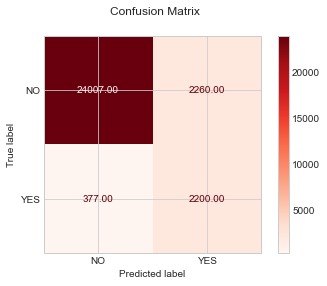

In [95]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(deseciontree_model, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

# KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train_os, y_train_os)
y_predicted_KNN = KNN_model.predict(x_test)
y_predicted_KNN 

array([0., 0., 1., ..., 0., 1., 0.])

In [97]:
KNN_model.score(x_test,y_test)

0.9087158507835251

In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_KNN))
print("Precision:",metrics.precision_score(y_test,y_predicted_KNN))
print("Recall:",metrics.recall_score(y_test, y_predicted_KNN))

Accuracy: 0.9087158507835251
Precision: 0.4934272300469484
Recall: 0.8156771439658518


In [99]:
cm=confusion_matrix(y_test,y_predicted_KNN)
cm

array([[24109,  2158],
       [  475,  2102]], dtype=int64)

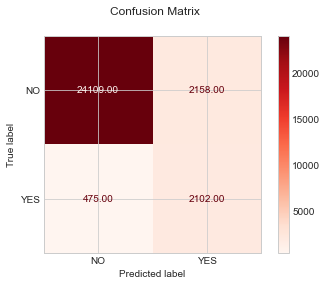

In [101]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(KNN_model, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

# Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model= GaussianNB()
naive_bayes_model.fit(x_train_os, y_train_os)
y_predicted_naive = naive_bayes_model.predict(x_test)
y_predicted_naive

array([0., 0., 1., ..., 0., 0., 0.])

In [103]:
naive_bayes_model.score(x_test,y_test)

0.8856261267507974

In [104]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_naive))
print("Precision:",metrics.precision_score(y_test,y_predicted_naive))
print("Recall:",metrics.recall_score(y_test, y_predicted_naive))

Accuracy: 0.8856261267507974
Precision: 0.42335456475583866
Recall: 0.7737679472254559


In [105]:
confusion_matrix(y_test,y_predicted_naive)

array([[23551,  2716],
       [  583,  1994]], dtype=int64)

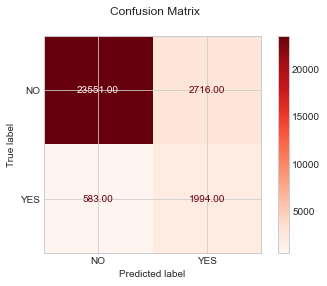

In [106]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(naive_bayes_model, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

# Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model= RandomForestClassifier(n_estimators = 10)
randomforest_model.fit(x_train_os, y_train_os)
y_predicted_randomforest = randomforest_model.predict(x_test)
y_predicted_randomforest

array([0., 0., 1., ..., 0., 0., 0.])

In [108]:
randomforest_model.score(x_test,y_test)

0.9558313687421994

In [109]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_randomforest))
print("Precision:",metrics.precision_score(y_test,y_predicted_randomforest))
print("Recall:",metrics.recall_score(y_test, y_predicted_randomforest))

Accuracy: 0.9558313687421994
Precision: 0.7563951200314837
Recall: 0.7458284827318588


In [110]:
confusion_matrix(y_test,y_predicted_randomforest)

array([[25648,   619],
       [  655,  1922]], dtype=int64)

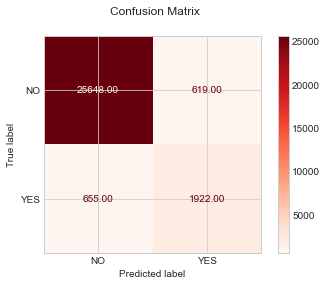

In [111]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(randomforest_model, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

# ADABoost

In [122]:
from sklearn.ensemble import AdaBoostClassifier
adaboostmodel = AdaBoostClassifier(random_state=1)
adaboostmodel.fit(x_train_os, y_train_os)
y_predicted_ada = adaboostmodel.predict(x_test)
y_predicted_ada

array([0., 0., 1., ..., 0., 0., 0.])

In [123]:
adaboostmodel.score(x_test,y_test)

0.937595340452087

In [124]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_ada))
print("Precision:",metrics.precision_score(y_test,y_predicted_ada))
print("Recall:",metrics.recall_score(y_test,y_predicted_ada))

Accuracy: 0.937595340452087
Precision: 0.6109049386240365
Recall: 0.8304229724485837


In [125]:
confusion_matrix(y_test,y_predicted_ada)

array([[24904,  1363],
       [  437,  2140]], dtype=int64)

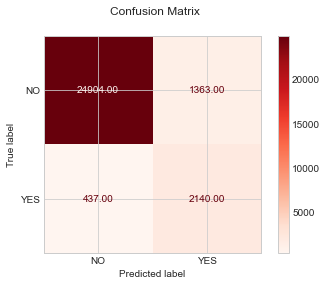

In [126]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(adaboostmodel, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

# XG Boost

In [127]:
from xgboost import XGBClassifier
xgboost=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgboost.fit(x_train_os, y_train_os)
y_predicted_xg = xgboost.predict(x_test)


<IPython.core.display.Javascript object>

In [129]:
xgboost.score(x_test,y_test)

0.8828179170711413

In [130]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_xg))
print("Precision:",metrics.precision_score(y_test,y_predicted_xg))
print("Recall:",metrics.recall_score(y_test,y_predicted_xg))

Accuracy: 0.8828179170711413
Precision: 0.42615412911532097
Recall: 0.8991074893286768


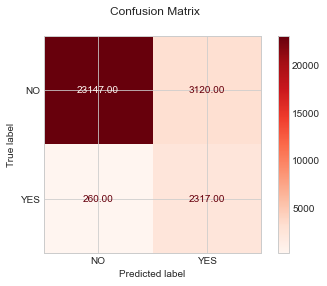

In [131]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(xgboost, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

# Gradient Boost

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
GradientBoosting.fit(x_train_os, y_train_os)
y_predicted_gb = xgboost.predict(x_test)

In [133]:
GradientBoosting.score(x_test,y_test)

0.8960615725974206

In [134]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_gb))
print("Precision:",metrics.precision_score(y_test,y_predicted_gb))
print("Recall:",metrics.recall_score(y_test,y_predicted_gb))

Accuracy: 0.8828179170711413
Precision: 0.42615412911532097
Recall: 0.8991074893286768


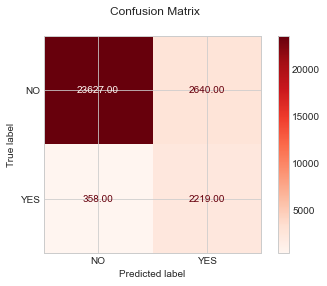

In [135]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(GradientBoosting, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

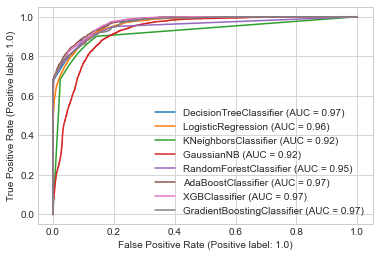

In [138]:
# ROC plot
from sklearn.metrics import plot_roc_curve
classifiers = [deseciontree_model, lr, KNN_model, naive_bayes_model,randomforest_model,adaboostmodel,xgboost,GradientBoosting]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test , y_test, ax=ax)

# Final Analysis

In [139]:
dfnew = pd.DataFrame()
dfnew['Model'] = ['DescisionTree','LogisticRegression','KNeighborsClassifier','GaussianNB','RandomForestClassifier','Adaboost model','Xgboost','Gradient Boosting']
dfnew['Accuracy'] = [0.9085771737623076,0.8856607960061018,0.9087158507835251,0.8856261267507974,0.9558313687421994,0.937595340452087,0.8828179170711413,0.8960615725974206]
dfnew['Precision']=[0.49327354260089684,0.4319682959048877,0.4934272300469484,0.42335456475583866,0.7563951200314837,0.6109049386240365,0.42615412911532097,0.42615412911532097]
dfnew['Recall']=[0.8537058595265813,0.8882421420256111,0.8156771439658518,0.7737679472254559, 0.7458284827318588,0.8304229724485837,0.8991074893286768,0.8991074893286768]
dfnew

,Model,Accuracy,Precision,Recall
0,DescisionTree,0.908577,0.493274,0.853706
1,LogisticRegression,0.885661,0.431968,0.888242
2,KNeighborsClassifier,0.908716,0.493427,0.815677
3,GaussianNB,0.885626,0.423355,0.773768
4,RandomForestClassifier,0.955831,0.756395,0.745828
5,Adaboost model,0.937595,0.610905,0.830423
6,Xgboost,0.882818,0.426154,0.899107
7,Gradient Boosting,0.896062,0.426154,0.899107


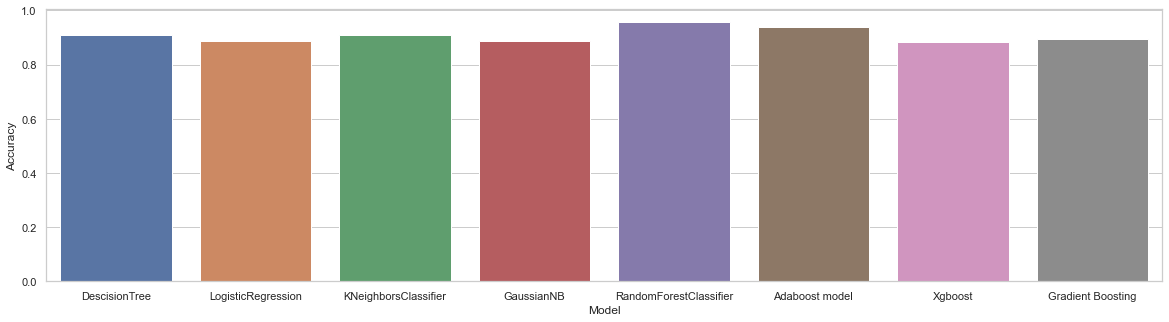

In [140]:
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.barplot(y ='Accuracy',x = 'Model',data = dfnew)

Here , we can clearly see that RandomForestClassifier has a better accuracy when compared to other algorithms

With the given health data, we implemented Exploratory Data Analysis, Visualized the data, Machine Learning models

and evaluated the model. After pre-processsing the data, then applied various classification algorithms on the data

which made it clear that Random Forest Classifier Model performed excellent with high accuracy (95%) compared to other algorithms.